In [47]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SPolrTggA4sV7u4LEOGwbO9FQNVmIf8FLGKf96ZWb7mM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'stackoverflowlabelpredictor-donotdelete-pr-wqipiycoxpizms'
object_key = 'Tags.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)[:100]
df_data_1.head()



,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SPolrTggA4sV7u4LEOGwbO9FQNVmIf8FLGKf96ZWb7mM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'stackoverflowlabelpredictor-donotdelete-pr-wqipiycoxpizms'
object_key = 'Questions.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_csv(body, sep='|',error_bad_lines=True, encoding='utf-8')[:100]
df_data_0.head()


In [ ]:
Qdf1.columns

Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body'],
      dtype='object')

In [ ]:
Qdf1 = Qdf1.drop(['OwnerUserId', 'CreationDate', 'ClosedDate'],axis=1)

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Combine all tags into a single string
all_tags = ' '.join(grouped_tags_final['Tags'])

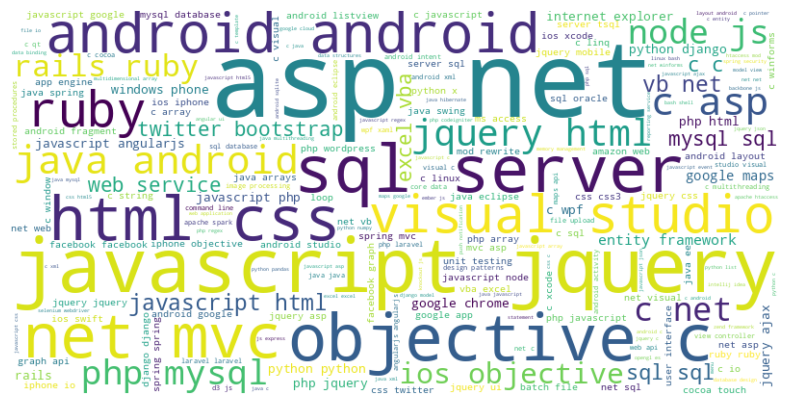

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_tags = grouped_tags_final['Tags'].str.split(', ').explode()
tag_counts = all_tags.value_counts()

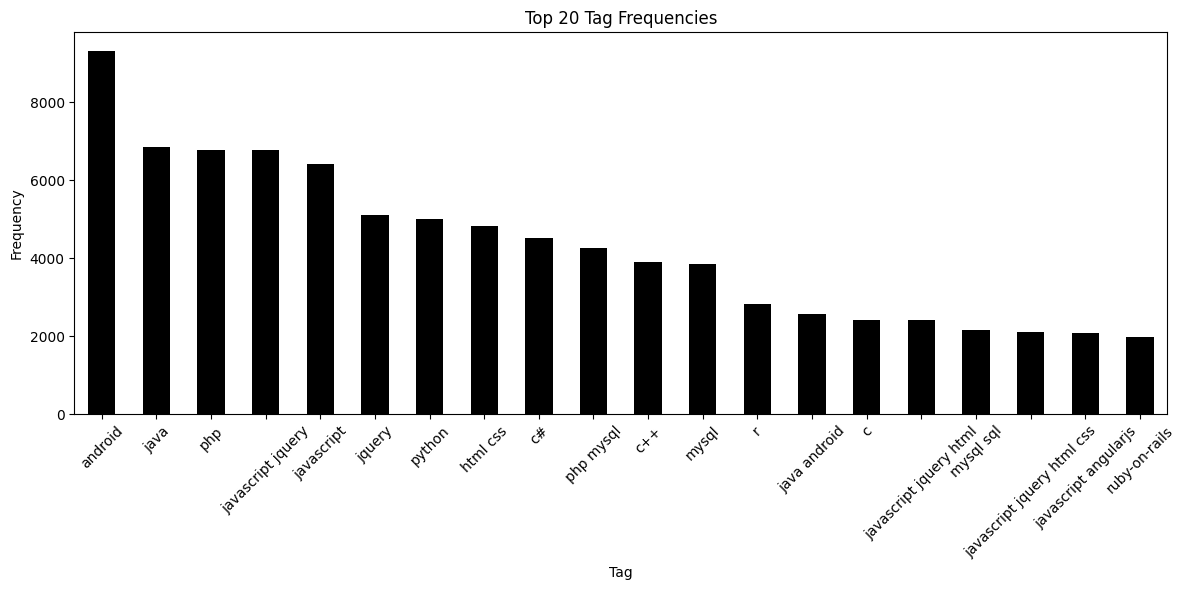

In [ ]:
plt.figure(figsize=(12, 6))
tag_counts[:20].plot(kind='bar', color='black')
plt.title('Top 20 Tag Frequencies')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df = Qdf1.merge(grouped_tags_final, on='Id')
df.head(5)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [ ]:
new_df = df[df['Score']>8]
new_df.info

<bound method DataFrame.info of                Id  Score                                              Title  \
0              80     26  SQLStatement.execute() - multiple queries in o...   
1              90    144  Good branching and merging tutorials for Torto...   
2             120     21                                  ASP.NET Site Maps   
3             180     53                 Function for creating color wheels   
4             260     49  Adding scripting functionality to .NET applica...   
...           ...    ...                                                ...   
1257356  39981800     11  How to achieve test isolation with Symfony for...   
1260386  40053550      9  The compiler suggests I add a 'static lifetime...   
1261242  40073530     16  Why doesn't ${@:-1} return the last element of...   
1262332  40098470     19  If multiple classes have a static variable in ...   
1262668  40106430     14   Using lambda in default initializer gcc vs clang   

                   

In [ ]:
new_df.isna().sum()

Id       0
Score    0
Title    0
Body     0
Tags     0
dtype: int64

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
new_df = new_df.drop(['Id', 'Score'],axis=1)

In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())

In [ ]:
all_tags = [item for sublist in new_df['Tags'].values for item in sublist]
len(all_tags)

129631

In [ ]:
all_tags

['flex',
 'actionscript-3',
 'air',
 'svn',
 'tortoisesvn',
 'branch',
 'branching-and-merging',
 'sql',
 'asp.net',
 'sitemap',
 'algorithm',
 'language-agnostic',
 'colors',
 'color-space',
 'c#',
 '.net',
 'scripting',
 'compiler-construction',
 'c++',
 'oop',
 'class',
 'nested-class',
 '.net',
 'web-services',
 'sql-server',
 'sql-server-2005',
 'deployment',
 'release-management',
 'c#',
 'visual-studio',
 'versioning',
 'windows',
 'visual-studio',
 'registry',
 'installation',
 'c#',
 'database',
 'loops',
 'connection',
 'c#',
 'asp.net',
 'c#',
 'file-locking',
 'unix',
 'size',
 'svn',
 'msbuild',
 'cruisecontrol.net',
 'web-applications',
 'dns',
 'subdomain',
 'account',
 '.net',
 '.net-3.5',
 'msbuild',
 'nant',
 'sql-server',
 'windows-server-2008',
 'sql-server',
 'sql-server-2008',
 'sql-server',
 'c#',
 '.net',
 'unit-testing',
 'testing',
 'svn',
 'version-control',
 'sql',
 'database',
 'postgresql',
 'stored-procedures',
 'triggers',
 'sql',
 'sql-server',
 'c#',
 

In [ ]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

11282

In [ ]:
import nltk

In [ ]:
flat_list = [item for sublist in new_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]
tags_features

['java',
 'c#',
 'javascript',
 'android',
 'python',
 'c++',
 '.net',
 'php',
 'jquery',
 'ios',
 'html',
 'css',
 'iphone',
 'objective-c',
 'c',
 'ruby-on-rails',
 'sql',
 'ruby',
 'mysql',
 'asp.net',
 'git',
 'r',
 'asp.net-mvc',
 'linux',
 'angularjs',
 'string',
 'node.js',
 'sql-server',
 'performance',
 'django',
 'xcode',
 'eclipse',
 'algorithm',
 'arrays',
 'wpf',
 'windows',
 'haskell',
 'c++11',
 'scala',
 'visual-studio',
 'json',
 'multithreading',
 'bash',
 'regex',
 'swift',
 'osx',
 'html5',
 'database',
 'unit-testing',
 'xml',
 'spring',
 'cocoa-touch',
 'ajax',
 'ruby-on-rails-3',
 'visual-studio-2010',
 'debugging',
 'vim',
 'linq',
 'entity-framework',
 'shell',
 'twitter-bootstrap',
 'postgresql',
 'mongodb',
 'winforms',
 'list',
 'cocoa',
 'generics',
 'google-chrome',
 'css3',
 'maven',
 'oop',
 'asp.net-mvc-3',
 'perl',
 'http',
 'gcc',
 'delphi',
 'templates',
 'svn',
 'tsql',
 'image',
 'github',
 'rest',
 'security',
 'exception',
 'facebook',
 'math',
 

In [ ]:
import pickle
with open('tags_feature.pkl','wb') as f:
  pickle.dump(tags_features,f)

In [ ]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)
new_df.shape

(42395, 3)

In [ ]:
new_df.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,None
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"


In [ ]:
new_df.dropna(subset=['Tags'], inplace=True)
print(new_df.shape)
new_df.head()

(37075, 3)


,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[c++, oop, class]"


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x).get_text())
new_df.head()

,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,[svn]
2,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...,"[sql, asp.net]"
3,Function for creating color wheels,This is something I've pseudo-solved many time...,[algorithm]
4,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,"[c#, .net]"
5,Should I use nested classes in this case?,I am working on a collection of classes used f...,"[c++, oop, class]"


In [ ]:
from nltk.tokenize import ToktokTokenizer

In [ ]:
token=ToktokTokenizer()

In [ ]:
import string

In [44]:
def remove_punctuation(text):
    words=token.tokenize(text)
    filtered=[]
    for w in words:
        if w not in tags_features:
            new_w=w.translate(str.maketrans('', '', string.punctuation))
            filtered.append(new_w)
        else:
            filtered.append(w)
    s = " "
    s=s.join(filtered)
    return s


In [29]:
import re

In [28]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x))

In [ ]:
new_df['Body']= new_df['Body'].apply(lambda x: re.sub('<[^<]+?>','',x))
new_df.head()

,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,are there any really good tutorials explaining...,[svn]
2,ASP.NET Site Maps,has anyone got experience creating sql-based a...,"[sql, asp.net]"
3,Function for creating color wheels,this is something i have pseudo-solved many ti...,[algorithm]
4,Adding scripting functionality to .NET applica...,i have a little game written in c#. it uses a ...,"[c#, .net]"
5,Should I use nested classes in this case?,i am working on a collection of classes used f...,"[c++, oop, class]"


In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: remove_punctuation(x))

In [ ]:
new_df['Body'][10]

'what is the simplest way to connect and query a database for a set of records in c# '

In [33]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 kB 68.3 MB/s eta 0:00:00


In [36]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [37]:
nltk.download('stopwords')

True

In [38]:
lemma = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [39]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):

    stop_words = set(stopwords.words("english"))

    words=token.tokenize(text)

    filtered = [w for w in words if not w in stop_words]

    return ' '.join(map(str, filtered))

In [40]:
nltk.download('wordnet')

True

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x))
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x))

In [ ]:
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x))
new_df['Title'] = new_df['Title'].apply(lambda x: remove_punctuation(x))
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x))
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x))

In [ ]:
new_df.head()

,Title,Body,Tags
1,good branch merge tutorials tortoisesvn,really good tutorials explain branch merge apa...,[svn]
2,asp.net site map,anyone get experience create sqlbased asp.net ...,"[sql, asp.net]"
3,function create color wheel,something pseudosolved many time never quite f...,[algorithm]
4,add script functionality .net applications,little game write c use database backend trade...,"[c#, .net]"
5,use nest class case,work collection class use video playback recor...,"[c++, oop, class]"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorizer Is HERE


In [ ]:
new_df['Title']= new_df['Title'].astype(str)
vectorizer = TfidfVectorizer(max_features=5000)
X1 = vectorizer.fit_transform(new_df['Title'].str.lower())

In [ ]:
new_df['Body']= new_df['Body'].astype(str)
X2 = vectorizer.fit_transform(new_df['Body'].str.lower())

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
y = new_df['Tags']
multilabel_binarizer = MultiLabelBinarizer()
new_y = multilabel_binarizer.fit_transform(y)

In [ ]:
import pickle
with open('label.pkl','wb') as f:
  pickle.dump(multilabel_binarizer,f)

In [ ]:
new_y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from scipy.sparse import hstack

In [ ]:
X=hstack([X1,X2])

In [ ]:
X

<37075x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1584037 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25952, 10000) (11123, 10000) (25952, 100) (11123, 100)


In [ ]:
from sklearn.metrics import hamming_loss

In [ ]:
def print_score(y_pred, clf):
    print("Classifier: ", clf.__class__.__name__)
    jacard = np.minimum(y_test,y_pred).sum(axis=1) / np.maximum(y_test,y_pred).sum(axis=1)
    score=jacard.mean()*100
    print("Jacard score: {}".format(score))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    F1_Score=metrics.classification_report(y_test, y_pred).split()[-2]
    print('F1 Score of ',clf.__class__.__name__,":", F1_Score)
    print("-----------------------------------------------------------")
    return F1_Score

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from tqdm import tqdm
sgd = SGDClassifier()
lr = LogisticRegression()
# rf = RandomForestClassifier()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
Scores={}
for classifier in [sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=print_score(y_pred, classifier)
    Scores[classifier]=score

Classifier:  SGDClassifier
Jacard score: 49.12418711978184
Hamming loss: 0.9476759866942371
F1 Score of  SGDClassifier : 0.54
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  LogisticRegression
Jacard score: 42.51176241421678
Hamming loss: 1.041086037939405
F1 Score of  LogisticRegression : 0.47
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  LinearSVC
Jacard score: 53.04788875902785
Hamming loss: 0.9718601096826396
F1 Score of  LinearSVC : 0.59
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  Perceptron
Jacard score: 49.21875735819816
Hamming loss: 1.2774431358446463
F1 Score of  Perceptron : 0.56
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  PassiveAggressiveClassifier
Jacard score: 50.85126057975109
Hamming loss: 1.1780095298031108
F1 Score of  PassiveAggressiveClassifier : 0.58
-----------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle

In [ ]:
with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)

#Prediction

In [41]:
import pandas as pd

predData = {
    "title": ["serialization/deserialization using Java in python"],
    "body": ["trying python to serialize Python and deserialize from class object to Python using Java package. After looking into some documentation succeeded in Java the json class object but, when json out with complex class am not able to deserialize json  objects"]
}

pData = pd.DataFrame(predData)
pData.head()


,title,body
0,serialization/deserialization using Java in py...,trying python to serialize Python and deserial...


In [42]:
from bs4 import BeautifulSoup

In [ ]:
pData['title'] = pData['title'].apply(lambda x: str(x))
pData['title'] = pData['title'].apply(lambda x: clean_text(x))
pData['title'] = pData['title'].apply(lambda x: remove_punctuation(x))
pData['title'] = pData['title'].apply(lambda x: lemitizeWords(x))
pData['title'] = pData['title'].apply(lambda x: stopWordsRemove(x))
pData['title']= pData['title'].astype(str)

In [ ]:
pData['title']

0    serializationdeserialization use java python
Name: title, dtype: object

In [ ]:
pData['body']

0    try python serialize python deserialize class ...
Name: body, dtype: object

In [ ]:
with open('/content/tfidfVector.pkl', 'rb') as f:
    vecto = pickle.load(f)

In [ ]:
X1_pred = vecto.transform(pData['title'].str.lower())
X2_pred = vecto.transform(pData['body'].str.lower())

In [ ]:
X1_pred.shape

(1, 5000)

In [ ]:
X2_pred.shape

(1, 5000)

In [ ]:
X_pred = hstack([X1_pred, X2_pred])

In [ ]:
prediction = loaded_model.predict(X_pred)

In [ ]:
prediction

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
predicted_labels = multilabel_binarizer.inverse_transform(prediction)
print(predicted_labels)

[('java', 'json', 'python')]


# Loading Pickle File

## Classifier Pickle

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from io import BytesIO
import pickle

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SPolrTggA4sV7u4LEOGwbO9FQNVmIf8FLGKf96ZWb7mM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'stackoverflowlabelpredictor-donotdelete-pr-wqipiycoxpizms'
object_key = 'clfFinal.pkl'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

readrawdata = streaming_body_1.read()
clf = pickle.load(BytesIO(readrawdata))

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PassiveAggressiveClassifier from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator OneVsRestClassifier from version 1.2.2 when using version 1.1.1. This might l

# Deployment of Model

In [2]:
!pip install -U ibm-watson-machine-learning

In [3]:
from ibm_watson_machine_learning import APIClient

# Authenticate and set space 

In [4]:
wml_credentials = {
    "apikey":"rsDrcthxqZ-DlojxpWZbQA8BPIw18Hm9k_ZgHQHXBjsC",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [5]:
wml_client = APIClient(wml_credentials)

In [6]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------  ------------------------
ID                                    NAME                       CREATED
fcdb8de3-136b-4b45-a207-0e92614e0785  StackOverflowAutoLabeling  2023-08-24T14:18:03.747Z
------------------------------------  -------------------------  ------------------------


,ID,NAME,CREATED
0,fcdb8de3-136b-4b45-a207-0e92614e0785,StackOverflowAutoLabeling,2023-08-24T14:18:03.747Z


In [7]:
SPACE_ID = "fcdb8de3-136b-4b45-a207-0e92614e0785"

In [8]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [9]:
wml_client.software_specifications.list(100)

-----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
...,...,...,...,...,...
95,autoai-kb_3.0-py3.6,d139f196-e04b-5d8b-9140-9a10ca1fa91a,base,unsupported,autoai-kb_rt22.2-py3.10
96,spark-mllib_3.0-py36,d82546d5-dd78-5fbb-9131-2ec309bc56ed,base,unsupported,spark-mllib_3.3
97,autoai-kb_3.4-py3.8,da9b39c3-758c-5a4f-9cfd-457dd4d8c395,base,unsupported,autoai-kb_rt22.2-py3.10
98,kernel-spark3.2-r3.6,db2fe4d6-d641-5d05-9972-73c654c60e0a,base,not_provided,


## Save and Deploy the model

In [10]:
MODEL_NAME = "LabelPredictor"
DEPLOYMENT_NAME = "StackOverflowAutoLabeling"
DEMO_MODEL = clf

In [11]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [12]:
pickle.format_version

'4.0'

In [17]:
# Setup Model Meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
    
}

In [18]:
model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props
)

In [19]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'type': 'scikit-learn_1.1'},
 'metadata': {'created_at': '2023-08-26T10:39:35.444Z',
  'id': 'b2a04374-83f9-46fc-b91c-8c527c36b163',
  'modified_at': '2023-08-26T10:39:44.551Z',
  'name': 'LabelPredictor',
  'owner': 'IBMid-666003NV6T',
  'resource_key': 'b9e39fa4-295d-45f4-9bfa-4911cf9590c4',
  'space_id': 'fcdb8de3-136b-4b45-a207-0e92614e0785'},
 'system': {'warnings': []}}

In [20]:
model_id = wml_client.repository.get_model_id(model_details)

In [21]:
model_id

'b2a04374-83f9-46fc-b91c-8c527c36b163'

In [22]:
# Set Meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
    
}

In [23]:
# Deploy

deployment = wml_client.deployments.create(
        artifact_uid=model_id, 
    meta_props=deployment_props
        )



#######################################################################################

Synchronous deployment creation for uid: 'b2a04374-83f9-46fc-b91c-8c527c36b163' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3a3ca4d0-6ef4-45af-b42e-f2311064d4bb'
------------------------------------------------------------------------------------------------


